# (Carbon Dioxide Emission)
## by Shrouk Reda

## Preliminary Wrangling

> This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years.
There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features. I am listing them out here.

> Model
4WD/4X4 = Four-wheel drive
AWD = All-wheel drive
FFV = Flexible-fuel vehicle
SWB = Short wheelbase
LWB = Long wheelbase
EWB = Extended wheelbase

> Transmission
A = Automatic
AM = Automated manual
AS = Automatic with select shift
AV = Continuously variable
M = Manual
3 - 10 = Number of gears

> Fuel type
X = Regular gasoline
Z = Premium gasoline
D = Diesel
E = Ethanol (E85)
N = Natural gas

> Fuel Consumption
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

>CO2 Emissions
The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
df=pd.read_csv("CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

### What is the structure of your dataset?

> The dataset consists of 7385 rows and 12 columns.

### What is/are the main feature(s) of interest in your dataset?

> Engine size, Number of cylinders, Fuel Type.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Make and Model.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [5]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

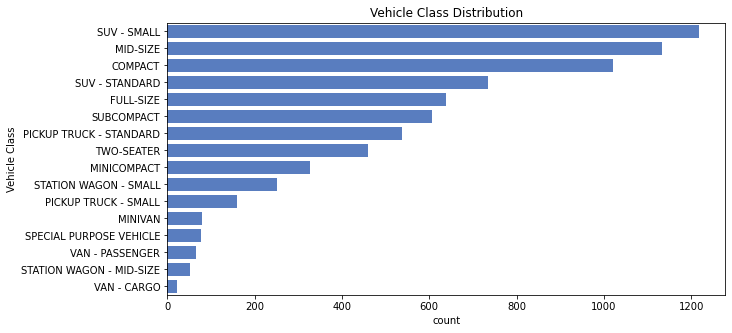

In [6]:
# the distribution of Vehicle Class
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("Vehicle Class Distribution")
sb.countplot(data = df, y = 'Vehicle Class', color = sb.color_palette('muted', 9)[0],
             order = df['Vehicle Class'].value_counts().index);

**From the above plot, We can observe that the SUV-SMALL class is the most pouplar in this dataset.**

Text(0.5, 0, 'Count')

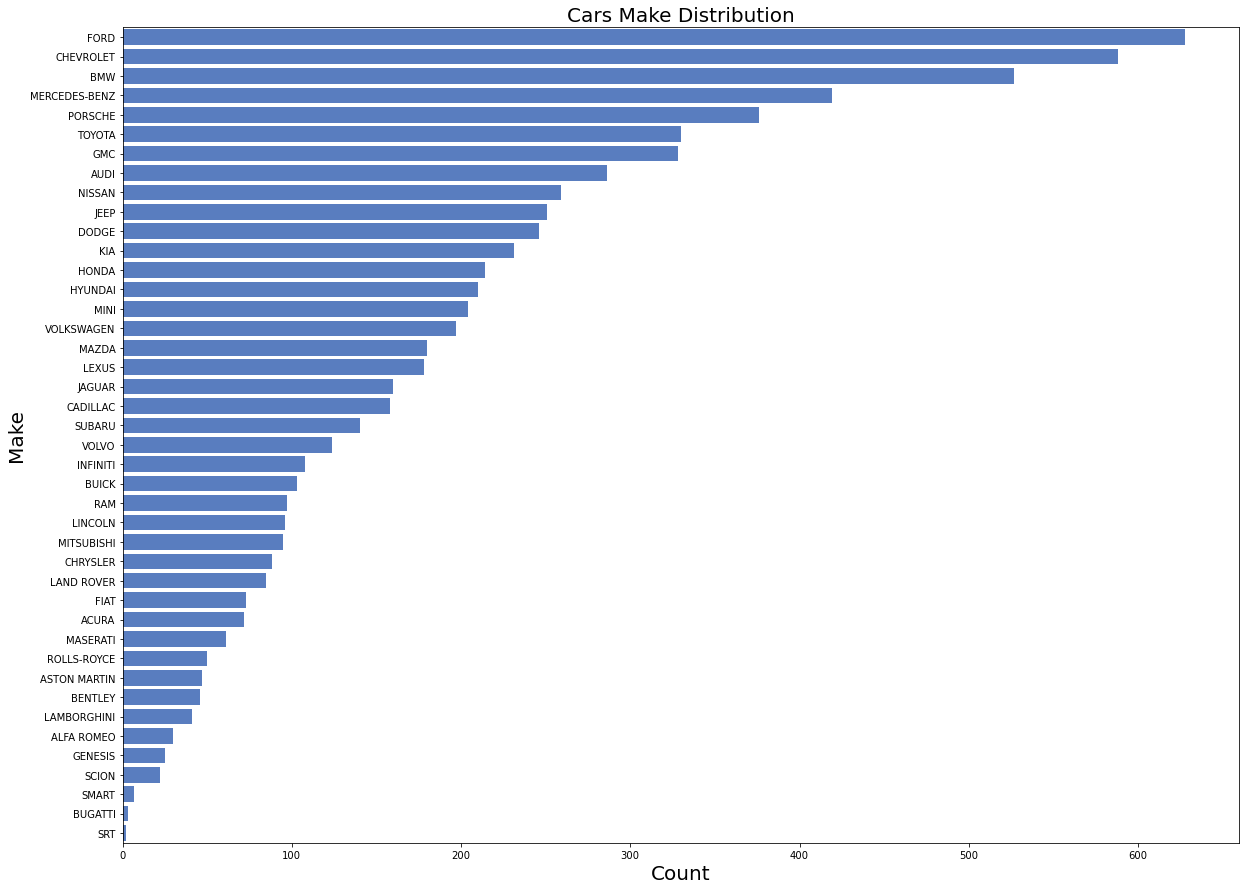

In [102]:
# Distribution of Make
plt.figure(figsize = [20, 15]) 
base_color = sb.color_palette()[0]
plt.title("Cars Make Distribution",fontsize=20)
sb.countplot(data = df, y = 'Make', color = sb.color_palette('muted', 9)[0],
             order = df['Make'].value_counts().index);
plt.ylabel('Make',fontsize=20)
plt.xlabel('Count',fontsize=20)

**From this plot, we can observe that the Make is NOT well distributed. As there are a lot of some types and very few others. And the most MAKE type used in canda is FORD, Also there are outliers like BUGATTI and SRT types**

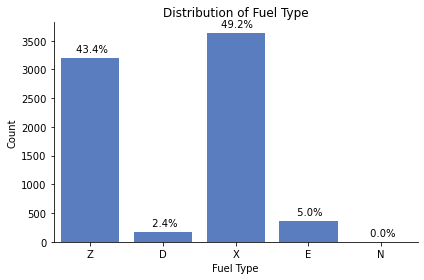

In [8]:
# check the distribution of Fuel Type
sb.countplot(x=df['Fuel Type'], color = sb.color_palette('muted', 9)[0])

locs, labels = plt.xticks()

counts = df.groupby('Fuel Type').size()
total = df.shape[0]
ticks, labels = plt.xticks()

for tick, label in zip(ticks, labels):
    count = counts.loc[label.get_text()]
    plt.text(x=tick, y=count+100, s=f'{(100*count/total): .1f}%', ha='center') 
plt.title('Distribution of Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
sb.despine(top=True)
plt.tight_layout();

**From this plot, we can observe that the most used type of fuel is Regular gasoline (X) and there is NO cars in this dataset uses Natural gas (N).**

> Replacing similar labels with single label

In [9]:
df['Transmission'] = np.where(df['Transmission'].isin(['A4','A3','A5','A6','A7','A8','A9','A10']),"Automatic",df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]),"Automated Manual",df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]),"Automatic with Select Shift",df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(["AV", "AV6", "AV7", "AV8", "AV10"]),"Continuously Variable",df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(["M4","M5", "M6", "M7"]),"Manual",df['Transmission'])

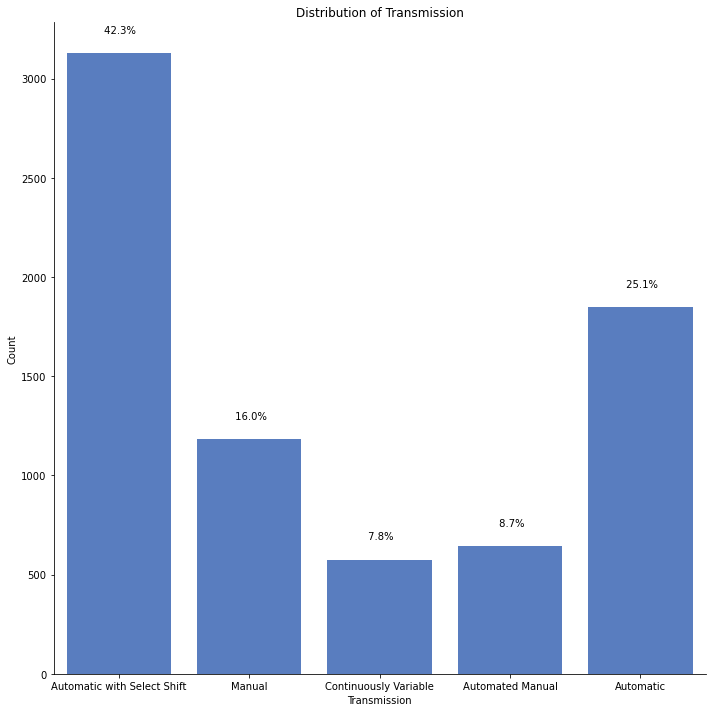

In [30]:
# check the distribution of Transmission after replacing similar labels
plt.figure(figsize = [10, 10]) 
sb.countplot(x=df['Transmission'], color = sb.color_palette('muted', 9)[0])

locs, labels = plt.xticks()

counts = df.groupby('Transmission').size()
total = df.shape[0]
ticks, labels = plt.xticks()

for tick, label in zip(ticks, labels):
    count = counts.loc[label.get_text()]
    plt.text(x=tick, y=count+100, s=f'{(100*count/total): .1f}%', ha='center') 
plt.title('Distribution of Transmission')
plt.xlabel('Transmission')
plt.ylabel('Count')
sb.despine(top=True)
plt.tight_layout();

**From this plot, we can observe that Automatic With Select Shift type is the most frequent in Transmission.**

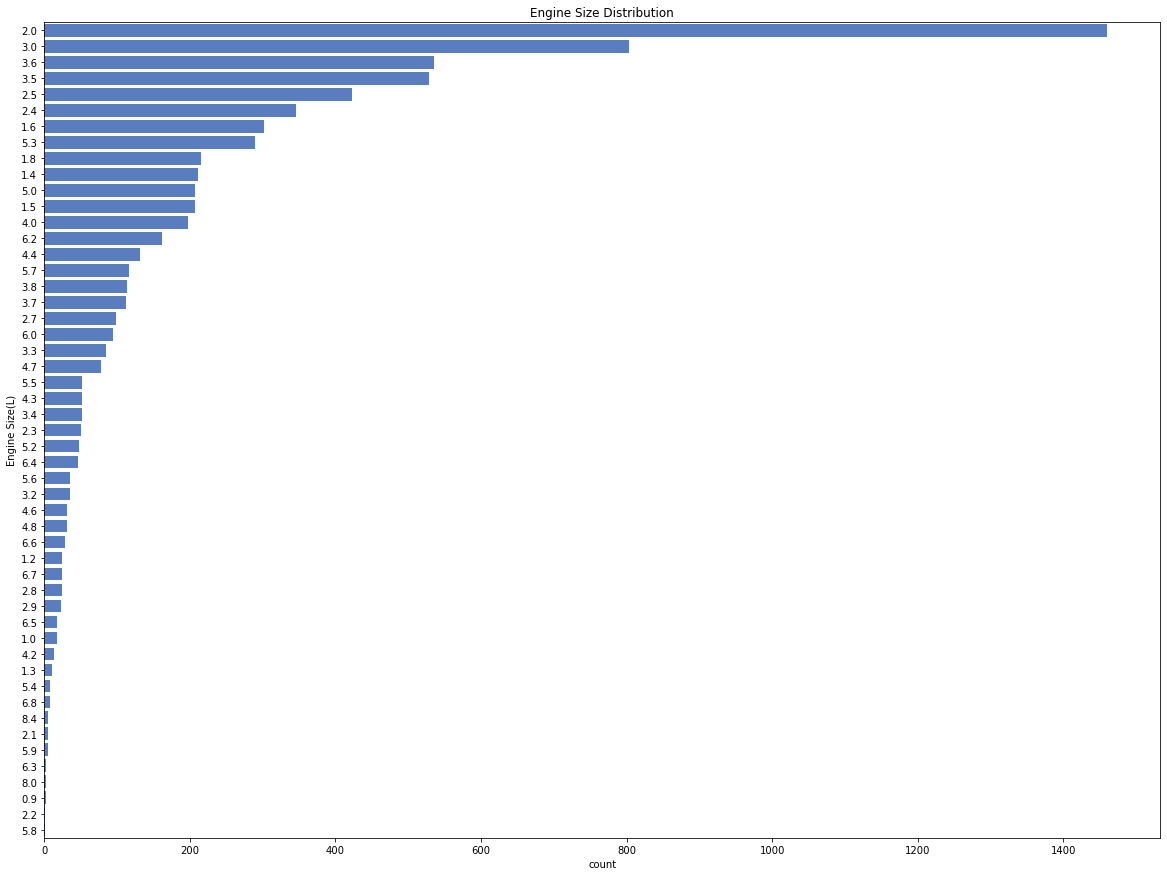

In [31]:
# Distribution of Engine Size(L)

plt.figure(figsize = [20, 15]) 
base_color = sb.color_palette()[0]
plt.title("Engine Size Distribution")
sb.countplot(data = df, y = 'Engine Size(L)', color = sb.color_palette('muted', 9)[0],
             order = df['Engine Size(L)'].value_counts().index);

**From this plot, we can observe that the Engine size is NOT well distributed. As there are a lot of some sizesand very few others. And the most frequent Engine size is 2**

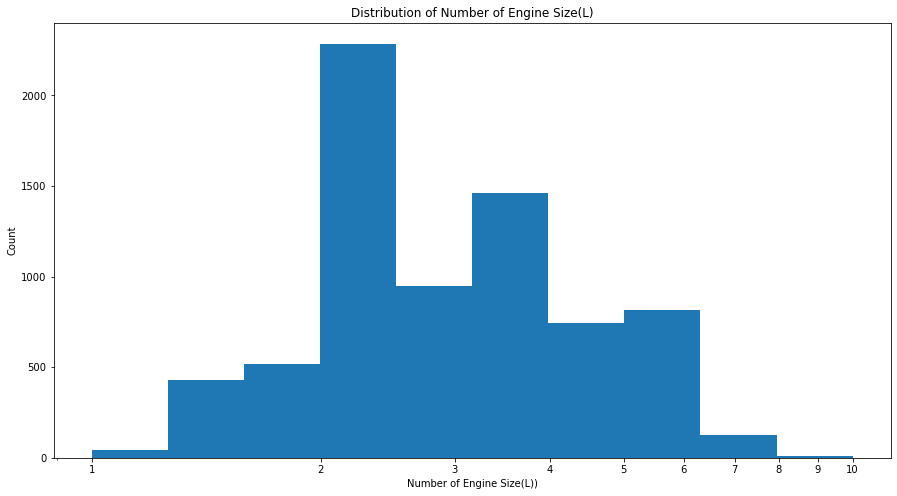

In [12]:
# logarthmic scale transformation on a histogram
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
log_bins = 10 ** np.arange(0.0, np.log10(df['Engine Size(L)'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[15, 8])
plt.hist(data = df, x = 'Engine Size(L)', bins = log_bins)
plt.title('Distribution of Number of Engine Size(L)')
plt.xlabel('Number of Engine Size(L))')
plt.ylabel('Count')
plt.xscale('log')
tick_locs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.xticks(tick_locs, tick_locs)
plt.show()

**Engine Size has a long tailed distribution. When plotted on a log-scale, the Engine Size distribution has 2 peaks between one 2 and 2.5 and the other one between 3.2 and 4, There are not a lot of Engine Sizes that lasted less than 2 and over 4.**

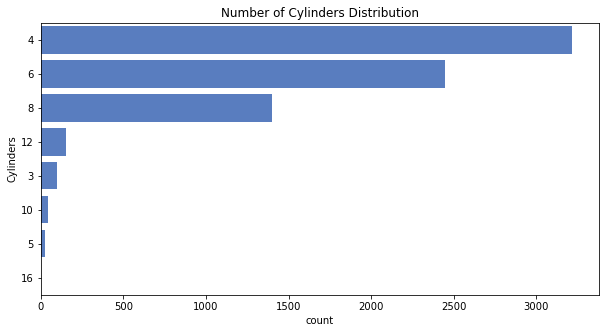

In [13]:
# Distribution of Number of Cylinders

plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("Number of Cylinders Distribution")
sb.countplot(data = df, y = 'Cylinders', color = sb.color_palette('muted', 9)[0],
             order = df['Cylinders'].value_counts().index);

**From this plot, we can observe that the most frequent Number of Cylinders is 4**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> **Engine Size has a long tailed distribution. When plotted on a log-scale, the Engine Size distribution has 2 peaks between one 2 and 2.5 and the other one between 3.2 and 4, There are not a lot of Engine Sizes that lasted less than 2 and over 4.**

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There is NO unusual distributios.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Text(0.5, 0.98, 'Effect of number of cylinders on Co2 emissions')

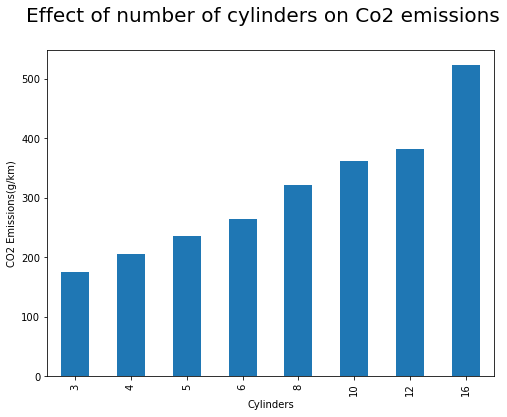

In [98]:
df.groupby(['Cylinders'])['CO2 Emissions(g/km)'].mean().sort_values().plot(kind='bar')
plt.ylabel('CO2 Emissions(g/km)')
plt.suptitle('Effect of number of cylinders on Co2 emissions', fontsize=20)

**From the above plot, we can observe that the higher the number of cylinders,  the higher the CO2 emissions.**

Text(0.5, 0.98, 'Effect of trasmission type on Co2 emissions')

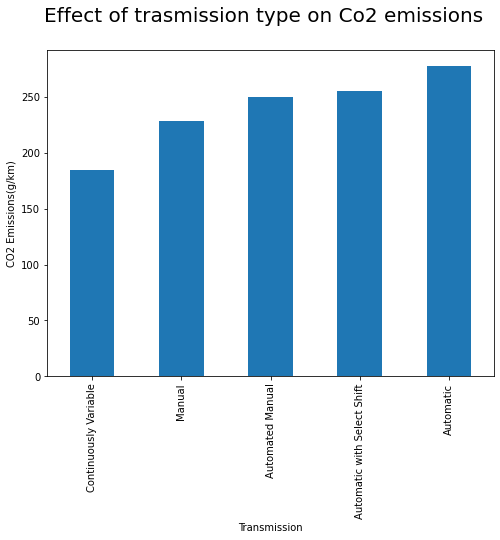

In [97]:
df.groupby(['Transmission'])['CO2 Emissions(g/km)'].mean().sort_values().plot(kind='bar')
plt.ylabel('CO2 Emissions(g/km)')
plt.suptitle('Effect of trasmission type on Co2 emissions', fontsize=20)

**From the above plot, we can observe that Automatic transmission type vehicles emitt a large amount of Co2.**

Text(0.5, 0, 'Fuel Consumption Hwy (L/100 km)')

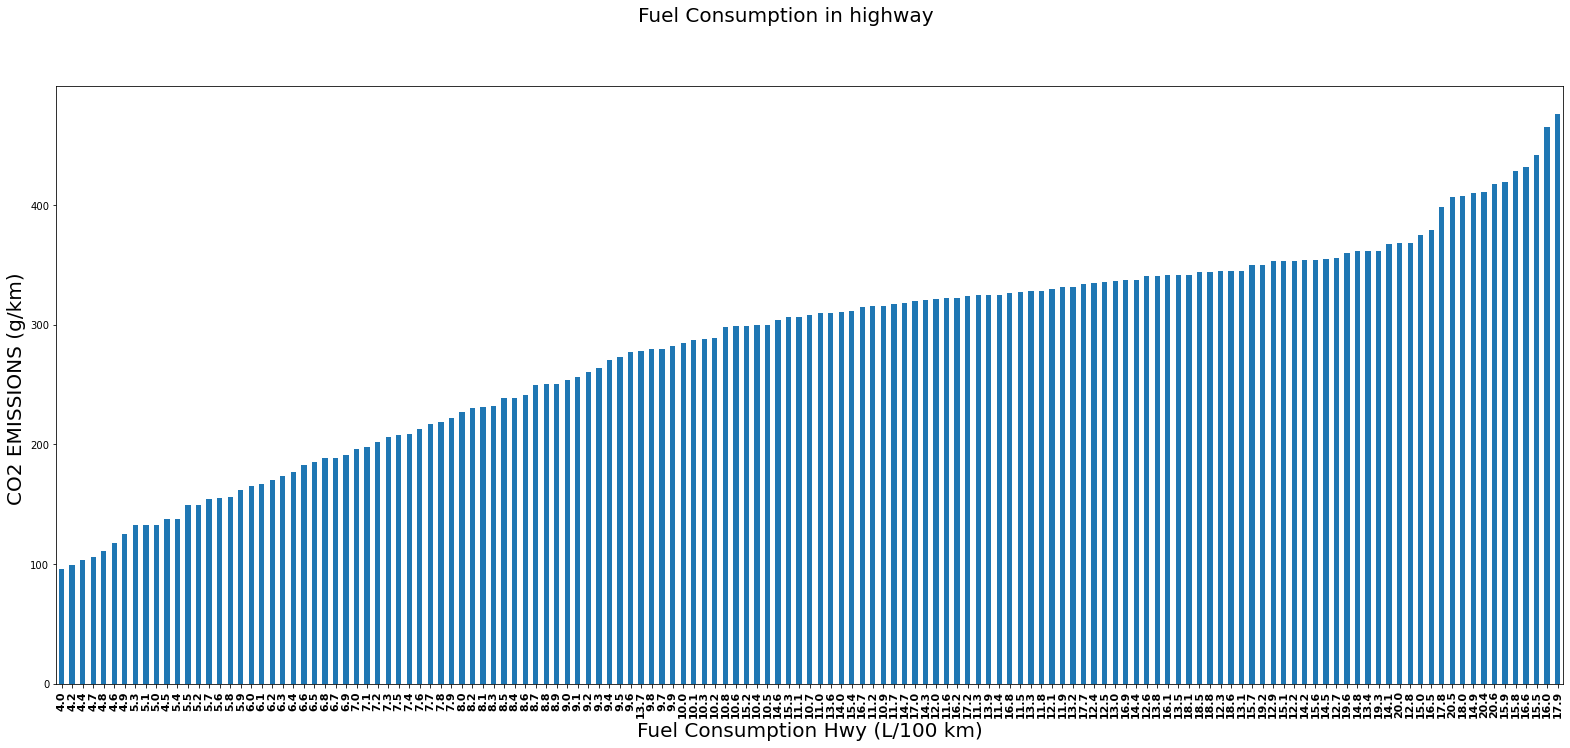

In [107]:
plt.figure(figsize=(27,11))
df.groupby(['Fuel Consumption Hwy (L/100 km)'])['CO2 Emissions(g/km)'].mean().sort_values().plot(kind='bar')
plt.xticks(rotation=90, horizontalalignment='center', fontweight='bold', fontsize='11')
plt.suptitle('Fuel Consumption in highway', fontsize=20)
plt.ylabel('CO2 EMISSIONS (g/km) ', fontsize=20)
plt.xlabel('Fuel Consumption Hwy (L/100 km)', fontsize=20)

Text(0.5, 0, 'Fuel Consumption City (L/100 km)')

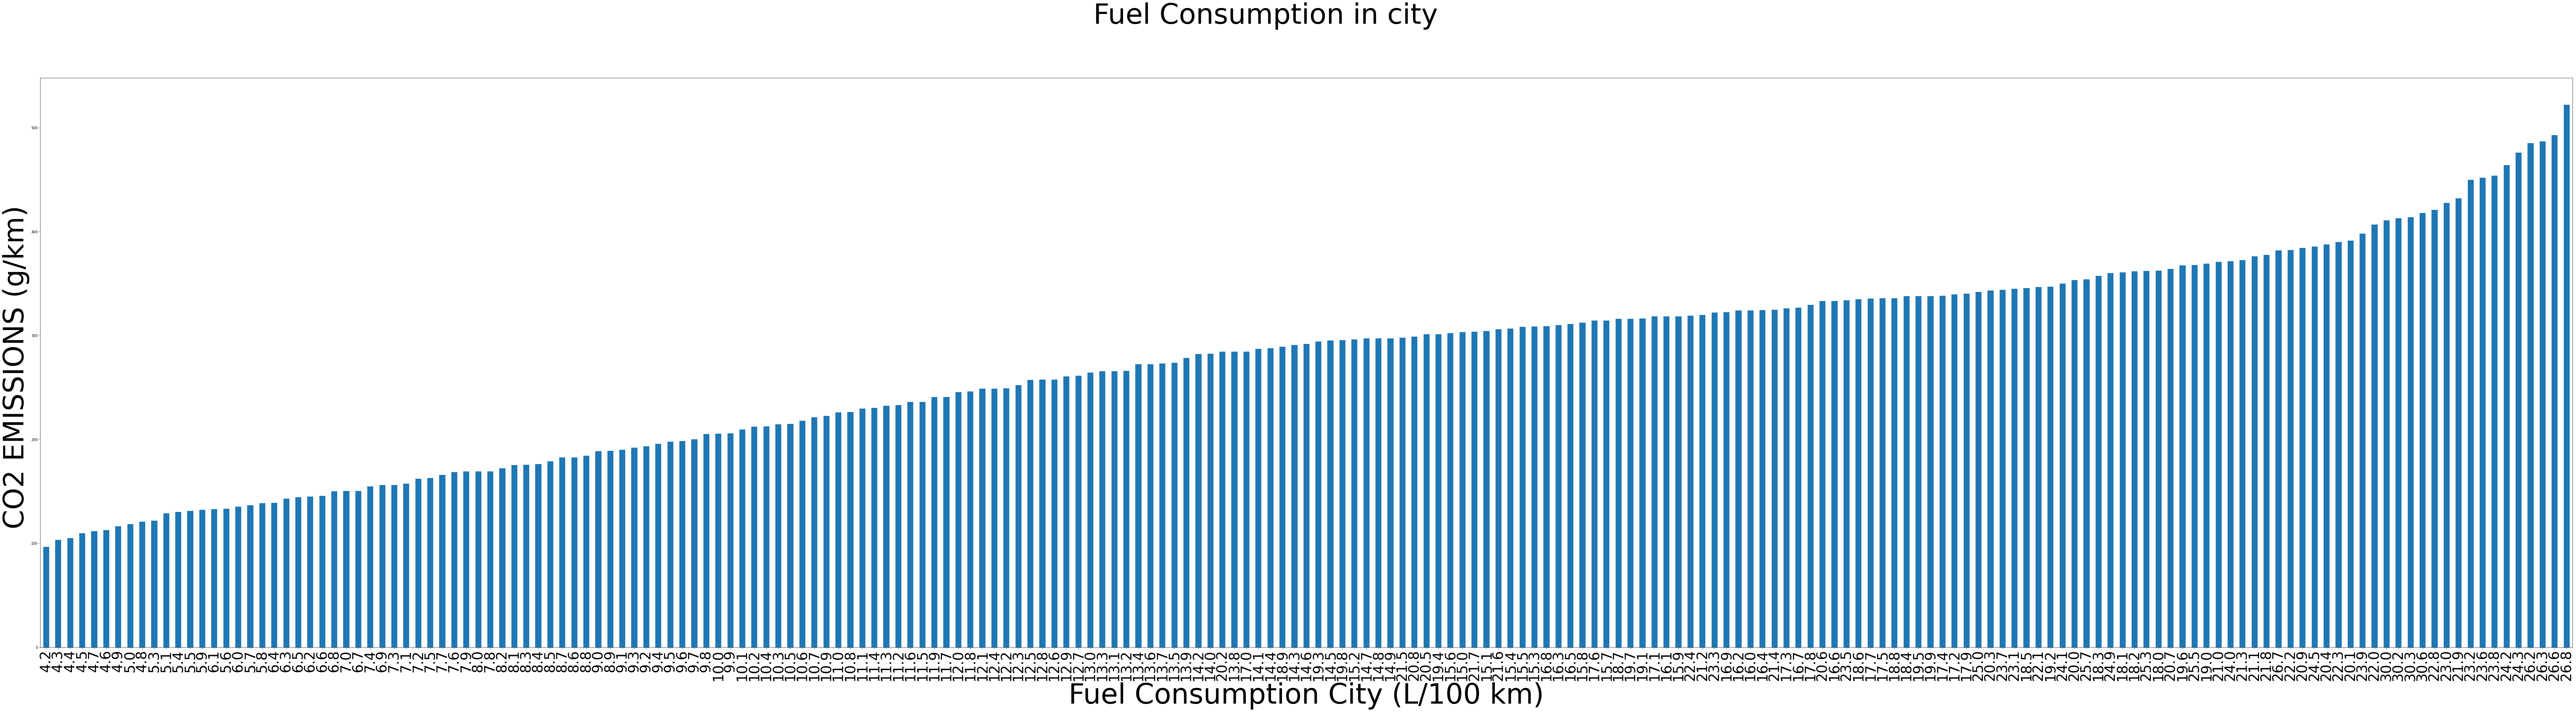

In [119]:
#I did my best :")
plt.figure(figsize=(130,30))
df.groupby(['Fuel Consumption City (L/100 km)'])['CO2 Emissions(g/km)'].mean().sort_values().plot(kind='bar')
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='40')
plt.suptitle('Fuel Consumption in city', fontsize=80)
plt.ylabel('CO2 EMISSIONS (g/km) ', fontsize=80)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize=80)

**The 2 above plots show that:**
<li> - As fuel consumtion of vehivles on city roads increases carbon emissions also increase.</li>
<li> - Even on highway as fuel consumtion of vechiles increses carbon emissions also increases.</li>

Text(0.5, 0.98, 'Co2 emission based on fuel type')

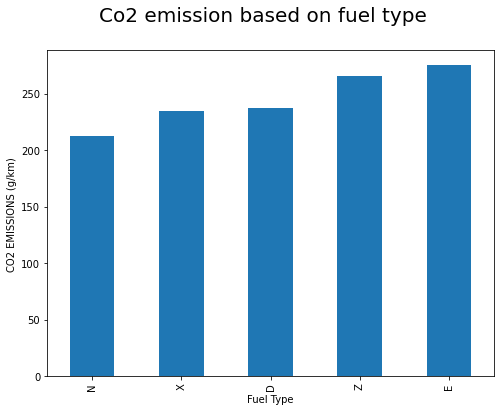

In [81]:
df.groupby(['Fuel Type'])['CO2 Emissions(g/km)'].mean().sort_values().plot(kind='bar')
plt.ylabel('CO2 EMISSIONS (g/km) ')
plt.suptitle('Co2 emission based on fuel type', fontsize=20)

> Ethanol emitts more amount of carbon dioxide.

Text(0.5, 0.98, 'Fuel Consumption in both city and highway (miles per gallon)')

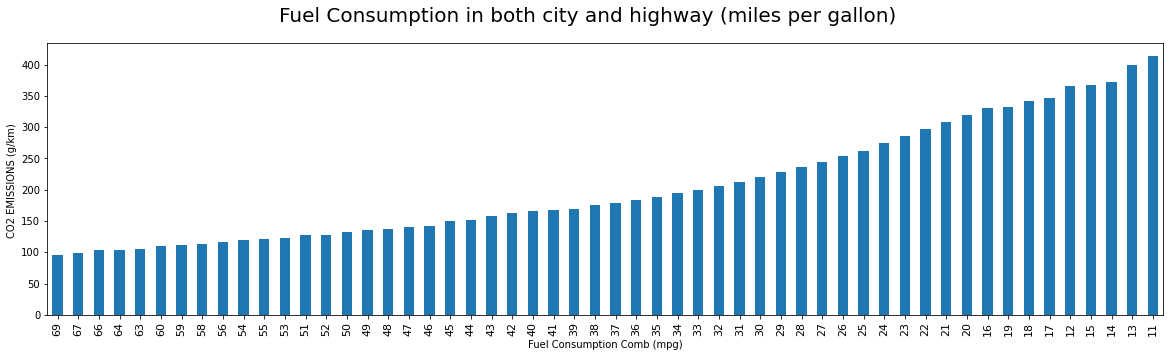

In [83]:
plt.figure(figsize=(20,5))
df.groupby(['Fuel Consumption Comb (mpg)'])['CO2 Emissions(g/km)'].mean().sort_values().plot(kind='bar')
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='11')
plt.ylabel("CO2 EMISSIONS (g/km) ")
plt.suptitle('Fuel Consumption in both city and highway (miles per gallon)', fontsize=20)

**From this plot, we can observe that as per gallon number of miles a vehicle travels increases carbon emissions decreases. It implies that less fuel consumption vehicles emitt less carbon emissions.**

Text(0.5, 0.98, 'Co2 emissions based on car make')

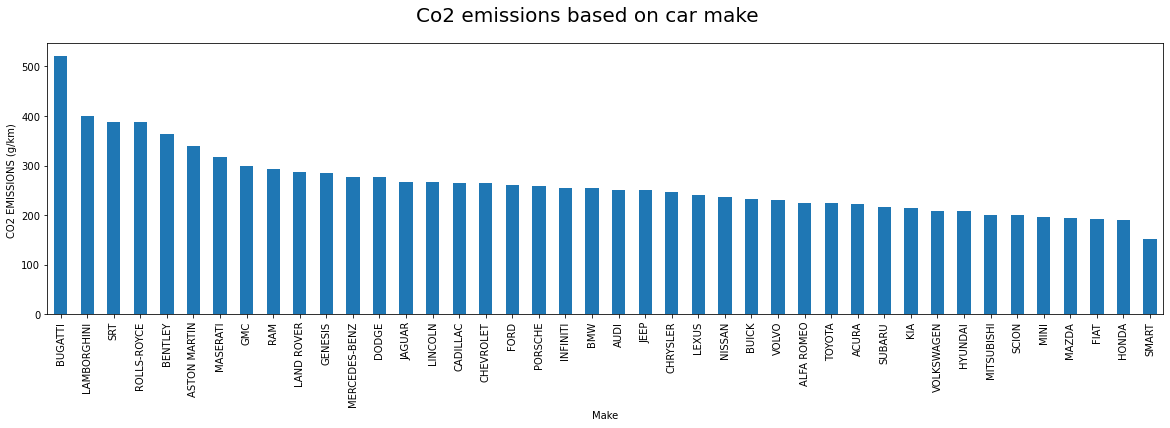

In [120]:
plt.figure(figsize=(20,5))
df.groupby(['Make'])['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('CO2 EMISSIONS (g/km) ')
plt.suptitle('Co2 emissions based on car make', fontsize=20)

**We can observe that most of the costly brand cars like BUGATTI and LAMBORGHINI are emmitting lot of carbon emissions and brands like HONDA and FIAT are least carbon emitting vehicles.**

Text(0.5, 0.98, 'Co2 emissions based on engine size')

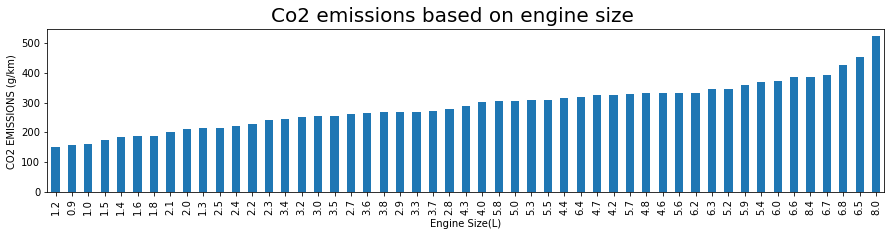

In [85]:
plt.figure(figsize=(15,3))
df.groupby(['Engine Size(L)'])['CO2 Emissions(g/km)'].median().sort_values(ascending=True).plot(kind='bar')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 EMISSIONS (g/km) ')
plt.suptitle('Co2 emissions based on engine size', fontsize=20)

 **From the above plot, we can observe that the larger the engine, the higher emissions of Co2.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

<li> - The larger engines emitts more Co2. </li>
<li> - As fuel consumtion of vehivles on city roads increases carbon emissions also increase.</li>
<li> - Even on highway as fuel consumtion of vechiles increses carbon emissions also increases.</li>
<li> - Most of the costly brand cars like BUGATTI and LAMBORGHINI are emmitting lot of carbon emissions and brands like HONDA and FIAT are least carbon emitting vehicles.</li>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We can observe that as per gallon number of miles a vehicle travels increases carbon emissions decreases. It implies that less fuel consumption vehicles emitt less carbon emissions. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

/home/shrouk/anaconda3/envs/tesorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Correlation between Co2 emissions and fuel consumption in city and highway')

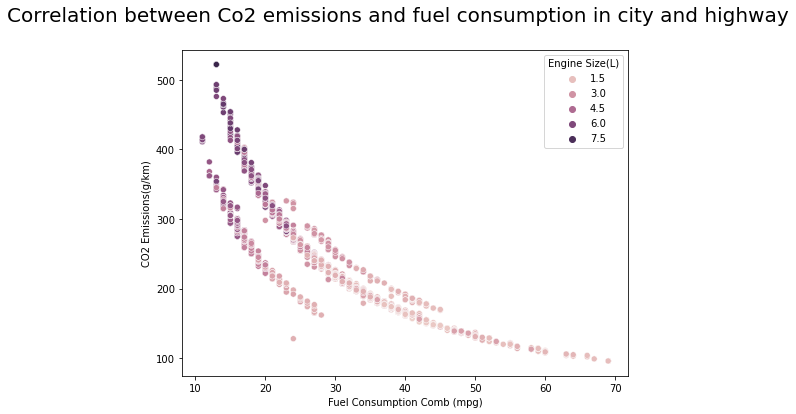

In [86]:
sb.scatterplot(df['Fuel Consumption Comb (mpg)'],df['CO2 Emissions(g/km)'],hue=df['Engine Size(L)'])
plt.suptitle('Correlation between Co2 emissions and fuel consumption in city and highway', fontsize=20)

**As number of miles a vehicle can travel with one gallon increases carbon Emissions decreases. Fuel Consumption Comb (mpg) is negatively corelated with CO2 Emissions.**

/home/shrouk/anaconda3/envs/tesorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Effect of engine size on Co2 emissions')

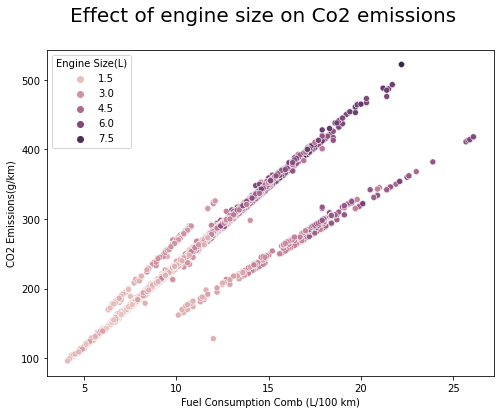

In [87]:
sb.scatterplot(df['Fuel Consumption Comb (L/100 km)'],df['CO2 Emissions(g/km)'],hue=df['Engine Size(L)'])
plt.suptitle('Effect of engine size on Co2 emissions', fontsize=20)

**We can see that Large size engines consumes more fuel and emitt large amount of carbon emissions.**

/home/shrouk/anaconda3/envs/tesorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Correlation between Co2 emissions and fuel consumption in city')

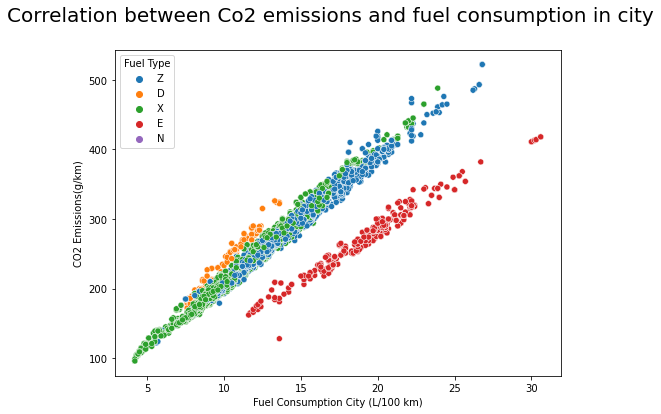

In [88]:
sb.scatterplot(df['Fuel Consumption City (L/100 km)'],df['CO2 Emissions(g/km)'],hue=df['Fuel Type'])
plt.suptitle('Correlation between Co2 emissions and fuel consumption in city', fontsize=20)

/home/shrouk/anaconda3/envs/tesorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Correlation between Co2 emissions and fuel consumption in highway')

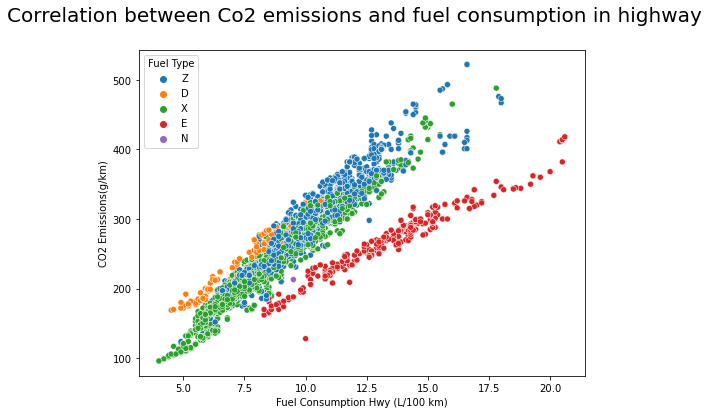

In [89]:
sb.scatterplot(df['Fuel Consumption Hwy (L/100 km)'],df['CO2 Emissions(g/km)'],hue=df['Fuel Type'])
plt.suptitle('Correlation between Co2 emissions and fuel consumption in highway', fontsize=20)

**From the above 2 plots we can observe that fuel consumption of vehicles on city and highway is positively corelated with carbon emissions.**

Text(0.5, 1.0, 'Correlation matrix')

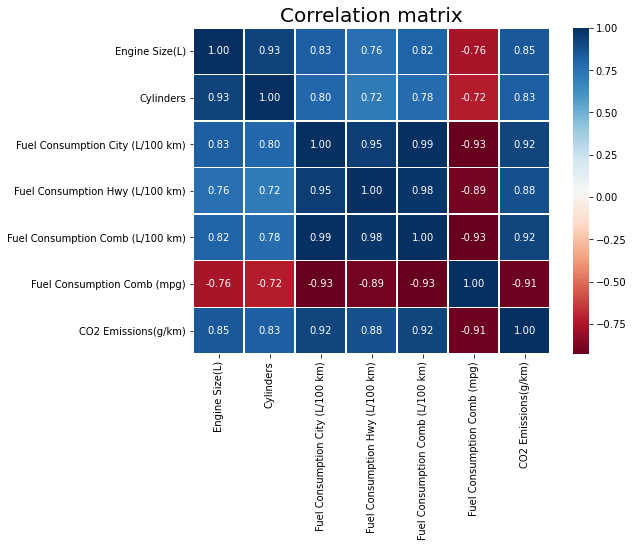

In [90]:
plt.rcParams['figure.figsize']=(8,6)
sb.heatmap(df.corr(),cmap='RdBu',linewidths=.5,fmt=".2f",annot = True);
plt.title("Correlation matrix",fontsize=20)

1. Fuel Consumption Comb (mpg) is negatively correlated to all the features.
2. Both Fuel Consumption City (L/100 km) and Fuel Consumption Hwy (L/100 km) have very strong positive correlation of 0.99 and 0.98 with Fuel Consumption Comb (L/100 km), since Fuel Consumption Comb (L/100 km) is redundant.
3. CO2 Emissions(g/km) has highest positive correlation of 0.92 with Fuel Consumption City (L/100 km) and Fuel Consumption Comb (L/100 km) and negative correlation of -0.91 with Fuel Consumption Comb (mpg).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As number of miles a vehicle can travel with one gallon increases carbon Emissions decreases. Fuel Consumption Comb (mpg) is negatively corelated with CO2 Emissions
> We can see that Large size engines consumes more fuel and emitt large amount of carbon emissions.

### Were there any interesting or surprising interactions between features?

> No, Most of them are expected.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!